<a href="https://colab.research.google.com/github/relaypy/MAIS202_Project/blob/main/A1_MAIS_202%2C_F2024_V.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAIS bootcamp Winter 2024 - Assignment 1

### Linear regression, K-Nearest Neighbors, Hyperparameter Tuning & Metrics (F1/recall/precision)

Due October **22** at **11:59 PM**

Please comment your code, and do not copy it from the internet. This class does not affect your grades, and it's sole purpose is for you to learn new skills.

Each section is independent and the assignment may therefore be completed in any order.

For this assignment, you will need the `numpy`, `sklearn` and `torch` libraries. Make sure to install them before starting (open a command prompt and run `pip install -U scikit-learn & pip install numpy & pip install torch` if you are on windows).



> **Before you get started, some Colab logistics:**
>
> * *Click on `File` -> `Save a copy in Drive` above, to save a copy of this colab notebook in your personal drive so that you can submit it later.*
> * *For those of you who've never used Jupyter/Colab notebooks before, simply press `Ctrl` + `Enter`, or click the play button in the top left, to run each cell.*
>
> * *As well, you may see some `assert` statements throughout the code. These are used within or after questions to help you ensure that your answers have the correct dimensions. If your answers do not have the correct dimensions, an `assertionError` will be thrown.*


## Part I - Linear regression

### **1 - Background**

This section will cover a simple implementation of linear regression, which is a supervised learning method that uses linear trends within a dataset to make new predictions.

This method consists in using currently existing datapoints to create a linear model (usually a line, but by extension a hyperplane), which is a function defined by a few parameters that when given unlabeled data as argument will return an estimate of the value to predict.

This makes the assumption that there is a linear relationship between the argument and the value to predict.

Given a dataset of m data points with n-dimensional features $\{x_{i1}, ..., x_{in}\}_{i=1} ^m$ and associated labels $\{y_i\}_{i=1}^m$, the linear model takes the form

$$y=X\beta + \epsilon$$

where

$y=\begin{pmatrix}
y_1\\
y_2\\
...\\
y_n
\end{pmatrix}$ is the matrix containing all labels;

$X=\begin{pmatrix}
1 & x_{11} & x_{12} & ... & x_{1n} \\
1 & x_{21} & x_{22} & ... & x_{2n} \\
... & ... & ... & ... & ... \\
1 & x_{m1} & x_{m2} & ... & x_{mn} \\
\end{pmatrix}$ is the matrix containing all features;

$\beta=\begin{pmatrix}
\beta_0 \\
\beta_1 \\
... \\
\beta_n \\
\end{pmatrix}$ is the coefficient of proportionality between each feature and the label;

$\epsilon=\begin{pmatrix}
\epsilon_0 \\
\epsilon_1 \\
... \\
\epsilon_n \\
\end{pmatrix}$ is the disturbance term or error variable to account for noise. We will be ignoring this term in the following parts of this exercise.

Creating a linear model means finding the parameters $\beta = \begin{pmatrix}\beta_1 & \beta_2 & ... & \beta_n \end{pmatrix}$. And since we are looking for an accurate model, we want parameters that minimize error between prediction and actual value. Here, we will be interested in minimizing squared error in order to have a nice convex loss function to work with.



#### Creating a linear model

Let $x_i = \begin{pmatrix} x_{i1} & x_{i2} & ... & x_{in}\end{pmatrix}$ be the features of a data point and let $\beta = \begin{pmatrix} \beta_1 & \beta_2 & ... & \beta_n\end{pmatrix}$ be the parameters of the model.

The model's prediction is then defined as $\beta_0 + \sum\limits_{j=1}^m\beta_j\times x_{ij}$.

For the sake of conciseness, we can let $x_i = \begin{pmatrix} 1 & x_{i1} & x_{i2} & ... & x_{in}\end{pmatrix}$ instead, and the formula becomes $\sum\limits_{j=0}^m\beta_j\times x_{ij}$, which is seen to be the same as $\beta\cdot x_i$

Now remember that we are trying to minimize the [mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error) between predictions and actual results $y_i$ by adjusting $\beta$

$$\hat\beta=\arg\min\limits_{\beta}\sum\limits_{j=1}^n(\beta\cdot x_i - y_i)^2$$

The loss function is $\sum\limits_{j=1}^n(\beta\cdot x_i - y_i)^2$. It can be rewritten, defining X and Y as the matrices containing the features and labels respectively, as
$$\begin{align*}
&||X\beta-Y||^2\\
&=(X\beta - Y)^T(X\beta-Y)\\
&=Y^TY-Y^TX\beta-\beta^TX^TY+\beta^TX^TX\beta
\end{align*}$$

As previously stated, the mean squared error is convex, and hence the optimum solution is where the gradient is zero. The gradient in question is
$$\begin{align*}
&\frac{\delta(Y^TY-Y^TX\beta-\beta^TX^TY+\beta^TX^TX)}{\delta\beta}\\
&=-2X^TY+2X^TX\beta
\end{align*}$$


By setting the gradient to zero, we find the formula for the optimum parameters

$$\begin{align*}
-2X^TY+2X^TX &= 0\\
X^TX\beta &= X^TY\\
\beta &= (X^TX)^{-1}X^TY
\end{align*}$$

> Hence, the best parameters for the linear model are obtained through the formula
$\beta=(X^TX)^{-1}X^TY$.

#### Using a linear model to make predictions

Once the $\beta$ parameters have been calculated, to make a new prediction based on some data point $x = \begin{pmatrix} x_1 & x_2 & ... & x_n\end{pmatrix}$, we simply add a 1 at the beginning of the vector, such that $x = \begin{pmatrix} 1& x_1 & x_2 & ... & x_n\end{pmatrix}$ and calculate
$$y = \beta\cdot x$$

#### Example

Let's say we have three data points $x_1$, $x_2$ and $x_3$. Each has 3 dimensions, and their respective values are $(2, 1, 1)$, $(2, 4, 0)$, $(3, 7, -1)$. Their respective labels are $1$, $2$ and $3$.

We calculate the best parameters $\beta$ for the linear model using the formula
$$\beta=(X^TX)^{-1}X^TY$$

Replacing with values:
$$\begin{align*}
\beta &= (X^TX)^{-1}X^TY\\
&= (\begin{pmatrix}
1 & 1 & 1\\
2 & 2 & 3\\
1 & 4 & 7\\
1 & 0 & -1
\end{pmatrix}
\begin{pmatrix}
1 & 2 & 1 & 1\\
1 & 2 & 4 & 0\\
1 & 3 & 7 & -1
\end{pmatrix})^{-1}
\begin{pmatrix}
1 & 1 & 1\\
2 & 2 & 3\\
1 & 4 & 7\\
1 & 0 & -1
\end{pmatrix}
\begin{pmatrix}
1\\
2\\
3
\end{pmatrix}\\
&= \begin{pmatrix}
80\\
2.3\\
-10\\
-8
\end{pmatrix}
\end{align*}$$


### **2 - Application**

In this section you will be coding linear regression. Start by running the following code snippets to load and visualize the data you will be using.

In [ ]:
# load libraries
import json
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen

In [ ]:
# Load dataset
f = urlopen("https://raw.githubusercontent.com/Scezaquer/MAIS202_2023_A1/main/a1_lin_regress_data.json")
dataset = json.load(f)

dataset = np.array(dataset)


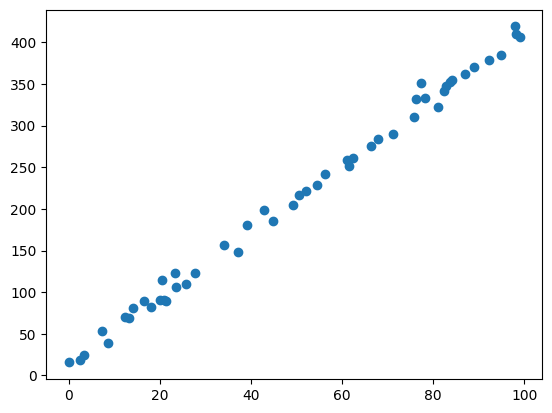

In [ ]:
# Show dataset plot
plt.scatter(dataset[:, 0], dataset[:, 1])
plt.show()

The `dataset` array is of the form `[[x0, y0], [x1, y1], [x2, y2], ..., [x49, y49]]`.

> Your task will be to fit a model to this dataset, and use it to make predictions. Note that there will be a second dataset where points are 4-dimensional (3 features and 1 label), hence you should try to make your code general enough to accept an arbitrary number of dimensions.

In [ ]:
from re import X
def linear_regression(dataset: np.array) -> np.array:

    beta = np.zeros(dataset.shape[1])


    #########################

    # Insert your code here
    # This should be returning the beta vector with entries fitted to the dataset
    # Don't forget to add the intercept
    X= np.column_stack([np.ones(dataset.shape[0]), dataset[:,:-1]])
    Y=dataset[:,-1]
    beta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),Y)
    #########################

    return beta


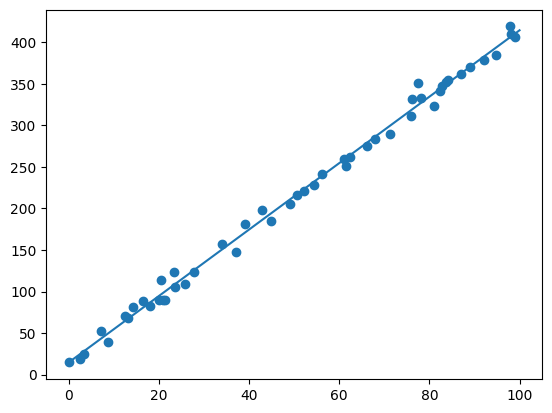

In [ ]:
# Show dataset plot overlaid with linear regression
beta = linear_regression(dataset)

plt.scatter(dataset[:, 0], dataset[:, 1])
plt.plot([0, 100], [np.dot(beta, [1, 0]), np.dot(beta, [1, 100])])
plt.show()

In [ ]:
def predict(beta: np.array, x: np.array) -> float:
    #######################

    # Insert your code here
    y = np.dot(beta[1:],x.T)+beta[0]
    # Given the fitted parameters and a new unlabeled point, make a prediction for what this point's label should be

    # Make sure to add the intercept
    return y
    #######################

In [ ]:
# Your code should be passing the following tests
# (if you modify them for testing purposes, make sure to return them to their original state)

def test_linear_regression_2D():
    dataset = np.array([[1, 2], [2, 4], [3, 6], [4, 8]])
    expected_beta = np.array([0, 2])

    result = linear_regression(dataset)

    assert np.allclose(result, expected_beta, 0.1)

def test_linear_regression_dataset(dataset):

    expected_beta = np.array([14.7, 4])

    result = linear_regression(dataset)

    assert np.allclose(expected_beta, result, 0.1)

def test_predict():
    beta = np.array([1, 2, 3])
    x = np.array([[2, 3], [4, 5]])
    expected_predictions = np.array([1*1 + 2*2 + 3*3, 1*1 + 2*4 + 3*5])

    prediction = predict(beta, x)

    assert np.allclose(prediction, expected_predictions)

test_linear_regression_2D()
test_linear_regression_dataset(dataset)
test_predict()

print("All tests passed!")

All tests passed!


Now, your code should be able to handle more dimensions. If it doesn't yet, you will have to modify it and make sure that the changes you implement do not break the previous test case. This time points will be 4-dimensional (3 features and 1 label).

In [ ]:
# Load dataset
f = urlopen("https://raw.githubusercontent.com/Scezaquer/MAIS202_2023_A1/main/a1_lin_regress_data2.json")
dataset2 = json.load(f)

dataset2 = np.array(dataset2)

In [ ]:
# Your code should be passing this test too

def test_linear_regression_dataset2(dataset2):

    beta = linear_regression(dataset2)

    expected_beta = np.array([17.1, 3, -2, 7])

    assert np.allclose(beta, expected_beta, 0.1)

test_linear_regression_dataset2(dataset2)

### Additional resources on Linear Regression

- Wikipedia, [*Mean Squared Error*](https://en.wikipedia.org/wiki/Mean_squared_error) ;
- Wikipedia, [*Linear Regression*](https://en.wikipedia.org/wiki/Linear_regression) ;
- [These notes on supervised learning](https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-supervised-learning) from students of CS 229, an ML course at Stanford.
- W3 Schools, [*Machine Learning - Linear Regression*](https://www.w3schools.com/Python/python_ml_linear_regression.asp) ;

- Geeksforgeeks, [*Linear Regression in Machine Learning*](https://www.geeksforgeeks.org/ml-linear-regression/) ;





## Part II - K-Nearest Neighbors (KNN)

### **1 - Background**

> This section will cover a simple implementation of the K-Nearest Neighbors (KNN) algorithm, which is an intuitive supervised learning method used to classify data.

KNN is an algorithm based on the intuition that a data point should have properties similar to other data points "close" to itself. It can be used in both the context of classification and of regression depending on implementation specifics:

- In the case of **classification**, the object will receive the label that appeared most often in the $k$ datapoints closest to itself.
  
  For example, *let's say I have a dataset of $100,000$ labeled fishes, and want to know the species of fish I caught based on it's measurable properties (size, weight...) using the 10-Nearest Neighbors algorithm. I will first calculate the distance between my fish and every point in the dataset. Then, I will pick the 10 closest ones. And finally, if I end up with 6 tunas, 3 moonfishes and 1 baracuda, I will conclude that the fish I caught must be a tuna.*

- In the case of **regression**, the object will receive a value based on the average of the $K$ datapoints closest to itself.
  
  For example, *let's say I want to set a price for a house in order to sell it using the 3-Nearest Neighbors algorithm based on its location ($x$ and $y$ coordinates). I will first look at the price of the 3 properties closest to the house. Imagine they are $\$840,000$, $\$670,000$ and $\$974,000$ respectively. I will then average these prices to get $\frac{840000+670000+974000}3 =\$ 828,000$ as the value of my house.*
  
  Note that this could also be a **weighted average** based on some properties of the data points (*for example, if I am selling a house, I might want to give more weight to the price of other houses than to the price of appartments nearby*), but also based on distance between data points (give more weight to the closest datapoints). Classification can be similarly weighted.

#### Distance

In both classification and regression, the key part of the algorithm is finding, in a set, the datapoints "closest" to our object in order to make a prediction. This requires having a definition of distance, which, in mathematics, we call a *metric* or a *distance function*.

Formally, a metric $d$ is defined over a set $M$ as a function $d:M{\times}M{\rightarrow\mathbb{R}^+}$, where d has four properties:

- **Identity of indiscernibles:** The distance from a point to itself is zero
  
  $\forall x \in M, d(x, x)=0$

  *More formally, $d(x,y)=0 \iff x=y$*

- **Positivity of distance:** the distance between two distinct points is always strictly positive
  
  $\forall x, y \in M$ such that $x\neq y, d(x, y)\gt 0$

- **Symmetry:** the distance from x to y is always the same as the distance from y to x
  
  $\forall x, y\in M, d(x,y)=d(y,x)$

- **The triangle inequality:** going from $x$ to $z$ while taking a detour by $y$ cannot be faster than going straight from $x$ to $z$.
  
  $\forall x, y, z\in M, d(x,z)\leq d(x, y)+d(y, z)$

Common metrics include the euclidean metric over $\mathbb{R}^n$, where
$$d(x, y) = \sqrt{\sum\limits _{i=1}^n (x_i-y_i)^2}$$
and its special case where $n=2$ which yields the pythagorean theorem, and is the standard way of defining a distance over a plane.

#### Lp norms

Typically, a metric will be induced by a norm, where each norm is, informally, a measure of size (or distance to the origin). More formally, a norm over a set $M$ is a function $p:M \rightarrow \mathbb{R}^+$, where $p$ respects three axioms:

- **The triangle inequality:** the size of the sum of two elements cannot be greater than the sum of the sizes of each individual element.
  
  $\forall x, y \in M, p(x+y)\le p(x)+p(y)$

- **Absolute Homogeneity:** scaling an element also scales its size.
  
  $\forall x\in M, s\in \mathbb{R}, p(sx)=|s|p(x)$

- **Positive definiteness:** the only element of size 0 is zero itself.
  
  $p(x)=0\Leftrightarrow x=0$

Generally, a norm is represented by the symbol $||\cdot||$, where $||x||$ is the norm of $x$.

Lp norms (or sometimes just p-norms) are a specific category of norms over $\mathbb{R}^n$ with the form
$$||x||_p=({\sum\limits_{i=1}^n}|x_i|^p)^{1/p}$$
with $p\geq1$. You may check for yourself that they meet all the requirements.

The euclidean norm is a special case of Lp norm where $p=2$:
$$||x||_2=({\sum\limits_{i=1}^n}|x_i|^2)^{1/2}$$
And it yields the standard definition of distance to the origin.

As stated before, metrics are generally induced by a norm. This is most commonly done in the following fashion:
$$d(x, y)=||x-y||$$
Where $d$ is the metric induced by the norm $||\cdot||$.

So for example, the euclidean metric $d$ may be defined as the metric induced by the Lp norm (with $p$ set to 2) $||\cdot||_2$, such that
$$d(x,y)=||x-y||_2=({\sum\limits_{i=1}^n}|x_i-y_i|^2)^{1/2}$$

#### Example

We will now be giving example calculations to find the distance between two arbitrary points.

Let us define $x, y\in\mathbb{R}^3$ such that
$$\begin{align*}
x&=(12.5, 14.7, -4.1)\\
y&=(-2, 12, 13.2)
\end{align*}$$

We want to calculate the distance between x and y using the euclidean metric. We let
$$d(x,y)=||x-y||_2=({\sum\limits_{i=1}^3}|x_i-y_i|^2)^{1/2}$$

and compute
$$\begin{align*}
d(x, y) & = ({\sum\limits_{i=1}^3}|x_i-y_i|^2)^{1/2}\\
& = (|12.5-(-2)|^2+|14.7-12|^2+|-4.1-13.2|^2)^{1/2}\\
& = (|14.5|^2+|2.7|^2+|-17.3|^2)^{1/2}\\
& = (210.25+7.29+299.29)^{1/2}\\
& = 516.83^{1/2}\\
& = 22.73
\end{align*}$$

Hence we conclude that the distance between $x$ and $y$ is about $22.73$ units.

### **2 - Applications**

> You will now be implementing KNN yourself for regression on real data. Run the following code snippets in order to load the dataset you will be using as reference. Follow along and execute the next snippets of code to setup the problem.

In [ ]:
# load libraries
import json
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen

In [ ]:
# Load dataset
f = urlopen("https://raw.githubusercontent.com/Scezaquer/MAIS202_2023_A1/main/a1_KNN_data.json")
dataset = json.load(f)

dataset = np.array(dataset)

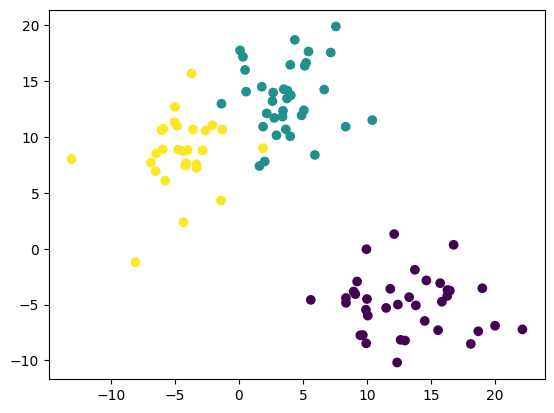

In [ ]:
# Show dataset plot
plt.scatter(dataset[:, 1], dataset[:, 2], c=dataset[:, 0])
plt.show()

You can see on the plot above `dataset`, which contains a labeled dataset you will be using to classify new datapoints. It is a numpy array of dimensions `(100, 3)`. It contains 100 datapoints (one per row), and each datapoint has 3 entries: `[label, x, y]`.

> `label` is the label of the entry, and it may be 0, 1 or 2.
>
> `x` and `y` are the entry's data, and they can take any real value.

Remember:
*You may access a numpy array similarly to how you would access lists in python.*

So `dataset[13][1]` would give me the `x` value of the 14th entry in the table. Note that the `data[13, 1]` syntax is equivalent.

For more information about numpy array indexing, go to https://numpy.org/doc/stable/user/basics.indexing.html

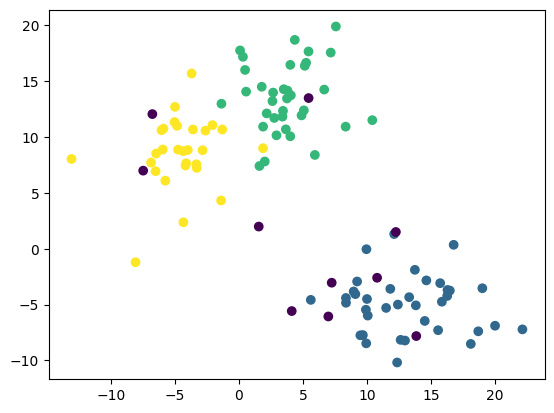

In [ ]:
# load unclassified data
f = urlopen("https://raw.githubusercontent.com/Scezaquer/MAIS202_2023_A1/main/a1_KNN_unclassified_data.json")
unclassified_data = json.load(f)

unclassified_data = np.array(unclassified_data)

# Merge classified and unclassified data together, giving a label of -1 for unclassified
all_data = np.append(
    dataset,
    np.append(-np.ones((unclassified_data.shape[0], 1)), unclassified_data, axis=1),
    axis=0
    )

# Show dataset plot and unclassified data overlaid together
plt.scatter(all_data[:, 1], all_data[:, 2], c=all_data[:, 0])
plt.show()

On the plot above, you can see both the labeled content of `dataset`, as well as the unlabeled datapoints contained in `unclassified_data`. Your task will be to implement the 5-Nearest Neighbors algorithm in order to label every point.

Here, `unclassified_data` is a numpy array of dimensions `(10, 2)` with a structure similar to that of `dataset`, but without label. So every point only has `[x, y]`.

First of all, implement the `distance` function. Given two points, it should return the euclidean distance between both.

Note: *here, points are two-dimensional, but you should try to make your function accept any n-dimensional points if you can.*

In [ ]:
def distance(x: list[float], y:list[float]) -> float:

    ###########
    # Insert your code here
    dist = np.sqrt(np.sum((np.array(x)-np.array(y))**2))
    return dist
    # Remove the exception and insert your code here

    # You may not use any library to implement this

    ###########

    raise NotImplementedError("You have not implemented the distance function yet")

In [ ]:
# Distance tests.
# Your implementation should not raise errors here.

# Test case 1: 2D points
point1 = [1.0, 2.0]
point2 = [4.0, 6.0]
expected_distance = 5.0
result = distance(point1, point2)
assert result == expected_distance, f"Expected distance: {expected_distance}, but got {result}"

# Test case 2: 3D points
point1 = [1.0, 2.0, 3.0]
point2 = [4.0, 6.0, 8.0]
expected_distance = 7.071067811865476
result = distance(point1, point2)
assert abs(result - expected_distance) < 1e-5, f"Expected distance: {expected_distance}, but got {result}"

# Test case 3: Mismatched dimensions
point1 = [1.0, 2.0]
point2 = [4.0, 6.0, 8.0]
try:
    distance(point1, point2)
    print("Test case 3 failed: Expected a ValueError for mismatched dimensions.")
except ValueError:
    print("Test case 3 passed: Raised a ValueError for mismatched dimensions.")

print("All tests passed!")


Test case 3 passed: Raised a ValueError for mismatched dimensions.
All tests passed!


Now that you have this function, implement KNN while using it.

The function takes `dataset` and `unclassified_data` as arguments, and should return a list of labels for unclassified_data.

In [ ]:
def KNN(dataset: list[list[int]], unclassified_data: list[list[int]], k: int = 5) -> list[int]:

    labels: list[int] = []

    """
    For every point x in unclassified_data, you should
    1 - Calculate the distance between x and every point in `dataset`
    2 - Pick the k closest points
    3 - Pick the most common label among them and add it to `labels` as the label for x

    You should be returning a list of labels, one label for each point in `unclassified_data`.

    You may create any helper function you feel you might need.
    You may not use any library apart from numpy array index manipulation and numpy.argsort().
    Your code should not modify any of the arguments.

    Separating dataset into two lists containing respectively the labels
    and the corresponding point coordinates might make things simpler.

    Make sure to remove the NotImplementedError
    """

    ########

    # Insert your code here

    for i in range(len(unclassified_data)):
      distancelist=[]
      for j in range(len(dataset)):
        distancelist.append([distance(dataset[j,1:],unclassified_data[i]),dataset[j,0]])

      distancelist = np.asanyarray(distancelist)
      dist = np.argsort(distancelist,axis=0)
      distancelist=distancelist[dist[:,0]][:k]


      mostco = distancelist[:,1].astype(int)
      y_pred = float(np.argmax(np.bincount(mostco)))
      labels.append(y_pred)

    ########

    return labels



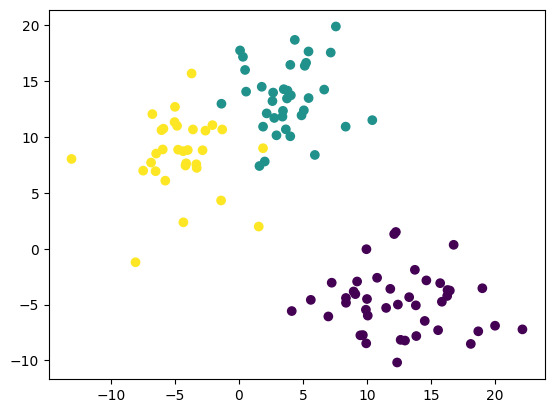

[0.0, 2.0, 0.0, 2.0, 0.0, 0.0, 1.0, 0.0, 0.0, 2.0]


In [ ]:
# Use this code snippet to visualize your code's results.

labels = KNN(dataset, unclassified_data)

# Merge classified and unclassified data together, giving your predicted labels for unclassified
all_data = np.append(
    dataset,
    np.c_[labels, unclassified_data],
    axis=0
    )

# Show dataset plot and newly classified data overlaid together
plt.scatter(all_data[:, 1], all_data[:, 2], c=all_data[:, 0])
plt.show()

print(labels)

In [ ]:
# KNN tests.
# Your implementation should not raise errors here.

# Verifies that the labels are the right ones
assert np.allclose([0, 2, 0, 2, 0, 0, 1, 0, 0, 2], labels), "Test case 0 failed"

# Test case 1: 2D dataset, k=3
dataset2 = np.array([
    [0, 1.0, 2.0],
    [1, 2.0, 4.0],
    [0, 3.0, 6.0],
    [1, 4.0, 8.0],
    [2, 5.0, 10.0]
])

unclassified_data = np.array([
    [1.5, 2.5],
    [3.5, 7.0]
])

k = 3
expected_labels = [0, 1]
predicted_labels = KNN(dataset2, unclassified_data, k)
assert predicted_labels == expected_labels, f"Test case 1 failed: Expected labels {expected_labels}, but got {predicted_labels}"

# Test case 2: 2D dataset, k=1
k = 1
expected_labels = [0, 0]
predicted_labels = KNN(dataset2, unclassified_data, k)
assert predicted_labels == expected_labels, f"Test case 2 failed: Expected labels {expected_labels}, but got {predicted_labels}"

# Test case 3: 2D dataset with ties, k=3
dataset2 = np.array([
    [0, 1.0, 2.0],
    [1, 2.0, 4.0],
    [0, 3.0, 6.0],
    [1, 4.0, 8.0],
    [1, 5.0, 10.0]
])

unclassified_data = np.array([
    [1.5, 2.5],
    [2.5, 5.0]
])

k = 3
expected_labels = [0, 0]
predicted_labels = KNN(dataset2, unclassified_data, k)
assert predicted_labels == expected_labels, f"Test case 4 failed: Expected labels {expected_labels}, but got {predicted_labels}"

print("All test cases passed!")

All test cases passed!


### Additional resources on KNN

- Wikipedia, [*K-Nearest Neighbors Algorihtm*](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)

- Wikipedia, [*Norms*](https://en.wikipedia.org/wiki/Norm_(mathematics))

- Wikipedia, [*Metric space*](https://en.wikipedia.org/wiki/Metric_space)

- Wikipedia, [*LP-Space*](https://en.wikipedia.org/wiki/Lp_space)

- Geeksforgeeks, [*K-Nearest Neighbor (KNN) Algorithm*](https://www.geeksforgeeks.org/k-nearest-neighbours/) ;

- Geeksforgeeks, [*Euclidean Distance*](https://www.geeksforgeeks.org/euclidean-distance/) ;

## Part III - Hyperparameter Tuning

### **1 - Background**

> This section will cover simple cases of hyperparameter tuning and the most common related algorithms.

#### Hyperparameters

Hyperparameters are opposed to parameters in that parameters will be automatically derived by the model during training, while hyperparameters control how this training is happening. The kinds of hyperparameters depend on the model used, and the problem it is applied to.

The importance of picking good hyperparameters can hardly be overstated, as they often make or break your model.

Common examples of hyperparameters include learning rate and epochs, but also the model's structure (number of layers and nodes per layers for neural networks).



```
# Ce texte est au format code
```

#### Hyperparameter Tuning

Hyperparameter tuning consists in picking the hyperparameters that optimize model performance in few epochs. There are multiple strategies to do this. We will be exploring random search, grid search and bayesian optimization.

#### Random search

This is the simplest method: simply pick the hyperparameters at random for $n$ iterations and keep the combination that performed best. It works best when there are few significant hyperparameters.

#### Grid search

For each hyperparameter, you specify a list of values to try. The algorithm will then go through every possible combination and output the one that optimizes some metric. Note that the time complexity of this approach quickly grows with the number of hyperparameters and the number of values to rey for each ($O(k^n)$, where $n$ is the number of hyperparameters and $k$ the number of values per hyperparameter)

#### Bayesian optimization

This method uses a bayesian approach to follow the intuition that previous runs allow us to make informed decisions about new parameters to try. We will not be detailing it here but feel free to [try it yourself](https://www.vantage-ai.com/en/blog/bayesian-optimization-for-quicker-hyperparameter-tuning).

### **2 - Applications**

> You will be coding random search and grid search in the case of a very simple neural network. It will be applied to a dummy classification problem where given any integer from 1 to 5 as input, your model will output that same number.

So for example, if your model gets 3 as input, it should return the label 3. If it gets 2 as input, it should return 2, etc.

First, run the following code snippets to setup the problem.

In [ ]:
# import relevant libraries
import numpy as np
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [ ]:
# create the training and test sets
dataset = np.random.randint(1, 6, 100).reshape((100, 1)).astype(np.float32)

In [ ]:
# You do not need to understand this code snippet (yet)

# Create the network
class Net(nn.Module):
    def __init__(self, nbr_layers, neurons_per_layers):
        super().__init__()
        self.network = nn.ModuleList()
        self.network.append(nn.Linear(1, neurons_per_layers))
        for x in range(nbr_layers-1):
            self.network.append(nn.Linear(neurons_per_layers, neurons_per_layers))
        self.network.append(nn.Linear(neurons_per_layers, 5))

    def forward(self, x):
        for layer in self.network:
            x = F.leaky_relu(layer(x))
        return x

# Create the optimizer
def create_optimizer(lr, net):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(net.parameters(), lr=lr)

    return criterion, optimizer

def train(optimizer, dataset, net, criterion):
    losses = []
    # Get the inputs;
    # data is a list of [inputs, labels]

    for epoch in range(1000):  # loop over the dataset multiple times

        # create the training and test sets
        inputs, labels = dataset, dataset.reshape((100,)).astype(np.int64) - 1

        running_loss = 0.0

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(torch.tensor(inputs))
        loss = criterion(outputs, torch.tensor(labels))
        loss.backward()
        optimizer.step()

        # print statistics
        losses.append(loss.item())

    return losses

In [ ]:
def random_search():

    best_lr, best_nbr_layers, best_neurons_per_layers = 0, 0, 0
    best_loss = float('inf')

    for i in range(25):

        ##########################

        # Insert your code here
        nbr_layers=random.randint(1,10)
        neurons_per_layers=random.randint(1,10)
        lr = random.random()

        # You should be generating values at random for the variables
        # nbr_layers, neurons_per_layers and lr

        # nbr_layers is the number of layers in the network and needs to be a nonnegative integer
        # neurons_per_layers is the number of neurons per layer and needs to be a positive integer
        # lr is the learning rate, and is a positive floating point number usually close to 0

        # you should then update best_lr, best_nbr_layers and best_neurons_per_layers based on the losses values,
        # which is an array containing the performances of the model after each training step.
        # Ideally you would want loss to decline quickly for fast training, and to converge to a value as small as possible
        # for an accurate model.

        ##########################

        net = Net(nbr_layers, neurons_per_layers)           # Create network
        criterion, optimizer = create_optimizer(lr, net)    # Create optimizer
        losses = train(optimizer, dataset, net, criterion)  # Train and assess network loss
        if losses[0] < best_loss :
          best_lr = lr
          best_nbr_layers = nbr_layers
          best_neurons_per_layers = neurons_per_layers
          best_loss = losses[0]

    return best_lr, best_nbr_layers, best_neurons_per_layers

random_search()

(0.1385344377041391, 3, 10)

In [ ]:
def grid_search():
    best_lr, best_nbr_layers, best_neurons_per_layers = 0, 0, 0
    best_loss = float('inf')

    ###########################

    # Insert your code here.
    lr_possible=[0.5,0.8,1.0,0.4,0.32]
    nbr_layers_possible=[3,5,8,10,2,18]
    neurons_per_layers_possible=[6,10,13,15,11,8]
    # You should use the "create network -> create optimizer -> train and assess network loss" code from
    # the random_search function here as well.
    for i in range(len(lr_possible)):
      lr=lr_possible[i]
      for j in range(len(nbr_layers_possible)):
        nbr_layers=nbr_layers_possible[j]
        for k in range(len(neurons_per_layers_possible)):
          neurons_per_layers = neurons_per_layers_possible[k]

          net = Net(nbr_layers, neurons_per_layers)           # Create network
          criterion, optimizer = create_optimizer(lr, net)    # Create optimizer
          losses = train(optimizer, dataset, net, criterion)  # Train and assess network loss
          if losses[0] < best_loss :
            best_lr = lr
            best_nbr_layers = nbr_layers
            best_neurons_per_layers = neurons_per_layers
            best_loss = losses[0]


    ###########################

    return best_lr, best_nbr_layers, best_neurons_per_layers

grid_search()

(0.32, 2, 15)

### Additional resources on hyperparameter tuning

- Wikipedia, [*Hyperparameter optimization*](https://en.wikipedia.org/wiki/Hyperparameter_optimization) ;

- Wikipedia, [*Bayesian optimization*](https://en.wikipedia.org/wiki/Bayesian_optimization) ;

- Wikipedia, [*Random Search*](https://en.wikipedia.org/wiki/Random_search) ;

- Geeksforgeeks, [*Hyperparameter tuning*](https://www.geeksforgeeks.org/hyperparameter-tuning/) ;

- Jeremy Jordan, [*Hyperparameter tuning for machine learning models*](https://www.jeremyjordan.me/hyperparameter-tuning/) ;



## Part IV - Metrics

### **1 - Background**

> In this section, you will be exploring different metrics.

An essential part of machine learning is being able to assess how good a model is. Usually, this is done through comparing the model's predictions against the correct labels and putting a number on how far apart these are.

> Here, we will be exploring three metrics: precision, recall and f1.

These three metrics are specific to classification and hence do not apply to regression problems. These have their own metrics, some of which we explored in previous parts of this assignment (like Mean Squared Error), and we will not be going over them.

#### Introduction to Classification Problems:

In the realm of machine learning and data science, one of the fundamental tasks is to make sense of data by assigning it to predefined categories or classes. This task is often referred to as "classification." At its core, a classification problem involves the following key elements:


- **Data:** Classification begins with data – lots of it. This data typically comprises a collection of observations, with each observation represented by a set of features or attributes. These features serve as the basis for making predictions or decisions about the category to which each observation belongs.


- **Categories or Classes:** In classification, we seek to categorize each observation into one of several predefined classes or categories. These classes represent distinct and mutually exclusive groups that capture different aspects or characteristics of the data. For instance, in a medical diagnosis scenario, classes might represent disease categories such as "healthy," "mildly ill," or "severely ill."


- **Goal:** The primary goal of classification is to build a model or algorithm that can automatically assign new, unseen observations to the correct class based on their feature characteristics. This predictive capability enables us to make informed decisions, automate tasks, and gain valuable insights from data.


Classification problems can be further categorized into two main types:


- **Binary Classification:** In binary classification, the task involves classifying observations into one of two possible classes. Common examples include spam email detection (spam or not spam) and medical diagnosis (positive or negative for a specific condition).


- **Multi-class Classification:** In multi-class classification, the problem extends beyond two classes, and the goal is to assign observations to one of several possible categories. Examples include handwritten digit recognition (assigning each digit from 0 to 9) and sentiment analysis (categorizing text as positive, negative, or neutral).


Note that when earlier, we used the KNN algorithm, we did so in a multi-class classification setting.


The success of a classification model is typically measured by its ability to accurately predict the correct class for new, unseen data points. To assess performance, various evaluation metrics and techniques specific to classification problems are employed. These metrics, which we will explore in detail, help us quantify how well our model is performing and provide insights into its strengths and weaknesses.


Classification problems are not only academically intriguing but also hold immense practical significance. They find applications in fields such as healthcare, finance, marketing, image recognition, natural language processing, and countless others. By mastering the concepts and techniques associated with classification, students and aspiring data scientists can unlock the power to make informed decisions and extract valuable insights from data in diverse domains.

#### Precision

Precision is defined as

$$ \frac{TP}{TP+FP} $$

Where $TP$ is the number of true positives and $FP$ the number of false positives.

As stated is [sklearn's documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html), intuitively, precision is the model's ability not to label as positive a sample that is negative.

It goes from 0 to 1, 1 being the best value.

#### Recall

Recall is extremely similar to precision, and is defined as

$$ \frac{TP}{TP+FN} $$

Where $TP$ is the number of true positives and $FN$ the number of false negatives.

As stated is [sklearn's documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html), intuitively, recall is the model's ability to find all the positive samples.

It goes from $0$ to $1$, $1$ being the best value.

#### F1

F1 (or sometimes balanced F-score or F-measure) is defined as

$$ \frac{2\times \text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$

and can be seen as a harmonic mean of precision and recall ([sklearn's documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)).

It goes from $0$ to $1$, $1$ being the best value.

### **2 - Applications**

Run the following code snippets to import the dataset and libraries for this problem.

In [ ]:
# load libraries
import json
from urllib.request import urlopen
from sklearn import metrics

In [ ]:
f = urlopen("https://raw.githubusercontent.com/Scezaquer/MAIS202_2023_A1/main/a1_metrics_data.json")
data = json.load(f)

`data` has form `{"true": [0, 1, 1, 0, ...], "pred": [0, 0, 1, 1, ...]}`.

Both `data['true']` and `data['pred']` have 256 entries.

Assuming this dataset comes from a binary classification problem, that `data['pred']` are the model's predictions and that `data['true']` are the correct labels, you will code precision, recall and f1.

Note that you may NOT use `sklearn` in your code, but you may use its documentation for reference.

#### Precision

In [ ]:
def precision(data: dict) -> float:

    ########################
    TP=0
    FP=0
    for i in range(len(data['true'])):
      if data['pred'][i] == 1:
        if data['true'][i]==1:
          TP+=1
        else :
          FP+=1

    precision = TP/(TP+FP)
    return precision

    # Insert your code here

    # You may NOT use sklearn

    ########################

    pass

In [ ]:
# Your code should pass the following test

assert precision(data) == metrics.precision_score(data['true'], data['pred'])

#### Recall

In [ ]:
def recall(data: dict) -> float:

    ########################

    # Insert your code here
    TP=0
    FN=0
    for i in range(len(data['true'])):
      if data['true'][i] == 1:
        if data['pred'][i]==1:
          TP+=1
        else:
          FN+=1



    recall = TP/(TP+FN)
    return recall
    # You may NOT use sklearn

    ########################

    pass

In [ ]:
# Your code should pass the following test

assert recall(data) == metrics.recall_score(data['true'], data['pred'])

#### F1

In [ ]:
def f1(data: dict) -> float:

    ########################

    # Insert your code here
    prec  = precision(data)
    rec = recall(data)

    f1 = 2*prec*rec/(prec+rec)

    # You may use the previously defined functions

    # You may NOT use sklearn

    ########################
    return f1

    pass

In [ ]:
# Your code should pass the following test

assert f1(data) == metrics.f1_score(data['true'], data['pred'])

### Additional resources on Metrics

- Wikipedia, [*Binary Classification*](https://en.wikipedia.org/wiki/Binary_classification)

- Wikipedia, [*Multiclass (multinomial) classification*](https://en.wikipedia.org/wiki/Multiclass_classification#:~:text=In%20machine%20learning%20and%20statistical,classes%20is%20called%20binary%20classification) ;

- Wikipedia, [*False positives and false negatives*](https://en.wikipedia.org/wiki/False_positives_and_false_negatives)

- Wikipedia, [*Multi-label classification*](https://en.wikipedia.org/wiki/Multi-label_classification)

- Wikipedia, [*F-Score*](https://en.wikipedia.org/wiki/F-score)

- Wikipedia, [*Confusion Matrix*](https://en.wikipedia.org/wiki/Confusion_matrix)

- [These notes](https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-machine-learning-tips-and-tricks) from CS 229, at Stanford.

## This is the end of your first MAIS202 assignment!

